<a href="https://colab.research.google.com/github/SeyfGoumeida/BI-NLP-/blob/main/BI(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from spacy.lang.en.stop_words import STOP_WORDS
import string
import re
import operator
from functools import reduce


In [ ]:
!python -m spacy download en_core_web_sm
!pip install spacy
#!pip install -u spacy

!pip install spacy-transformers
!pip install spacy_entity_linker
!python3 -m spacy_entity_linker "download_knowledge_base"

#à executer une seule fois et de redémarrer le runtime avec GPU 

     |████████████████████████████████| 13.6 MB 81 kB/s 
  Attempting uninstall: en-core-web-sm
    Found existing installation: en-core-web-sm 2.2.5
    Uninstalling en-core-web-sm-2.2.5:
      Successfully uninstalled en-core-web-sm-2.2.5
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [51]:
df = pd.read_csv('/content/PubMed_Diabets.csv')

In [52]:
df.head()

,text,label
0,Significant alterations in heart carbohydrate ...,1
1,Isolated spontaneously beating atria from stre...,1
2,The effects of streptozotocin-induced diabetes...,1
3,Isolated small intestinal microvillous membra...,1
4,Transplantation of adult rat pancreatic islet ...,1


In [53]:
print("Number of labels")
df.label.value_counts()


Number of labels


2    1919
1    1221
3    1214
Name: label, dtype: int64

In [54]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4354 entries, 0 to 4353
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4354 non-null   object
 1   label   4354 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 102.0+ KB


In [55]:

#punctuations
punctuations = string.punctuation
#stopwords
stop_words = list(STOP_WORDS)
def clean_text(
  string : str,
  ponctuation = '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~',
  stop_words = stop_words)->str : 

  #URLs
  string = re.sub(r"https?://\S+|www\.\S+",'',string)
  #html 
  string = re.sub(r'<.*?>','',string)
  #Numbers
  string = re.sub(r'[0-9]+','',string) 

  #Remove punctuations
  for x in string.lower():
    if x in punctuations:
      string = string.replace(x,"")
  #To lower
  string = string.lower()
  #Remove stop words
  string = ' '.join([word for word in string.split() if word not in stop_words])
  #Cleaning the whitespaces
  string = re.sub(r'\s', ' ', string).strip()
  return string
  
clean_text("hello it's me , i was wonderning   https://jahdjadad.com     if after all this years 02 ")

'hello wonderning years'

<function matplotlib.pyplot.show>

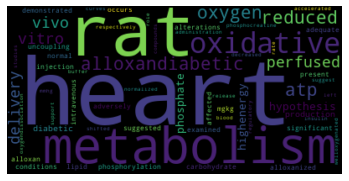

In [56]:

abstract = df.text.to_list()
abstracts_cleaned = [clean_text(x) for x in abstract]
#wordcloud for one document
text = abstracts_cleaned[0]
#Creat and generate a wordcloud image :
wordcloud = WordCloud().generate(text)
#Display the generated image
plt.imshow(wordcloud, interpolation= 'bilinear')
plt.axis("off")
plt.show

In [57]:
from sklearn.feature_extraction.text import CountVectorizer
abstracts_cleaned = [clean_text(x) for x in abstract]


In [58]:
vectorizer = CountVectorizer()
DocTerm_abstract = vectorizer.fit_transform(abstracts_cleaned)
print('type of DocTerm_abstract : ', type(DocTerm_abstract))
print("Documents / Mots  : ",DocTerm_abstract.shape)
print(DocTerm_abstract)

DocTerm_abstract = DocTerm_abstract.toarray()
print("******************************************")
print('DocTerm_abstract', type(DocTerm_abstract))


type of DocTerm_abstract :  <class 'scipy.sparse.csr.csr_matrix'>
Documents / Mots  :  (4354, 25233)
  (0, 21393)	1
  (0, 987)	1
  (0, 9815)	6
  (0, 3222)	1
  (0, 13298)	1
  (0, 14222)	4
  (0, 18787)	1
  (0, 12206)	1
  (0, 11736)	1
  (0, 894)	1
  (0, 14336)	1
  (0, 19625)	1
  (0, 22439)	1
  (0, 24072)	1
  (0, 17114)	4
  (0, 17948)	1
  (0, 16613)	1
  (0, 899)	1
  (0, 19603)	5
  (0, 24700)	2
  (0, 16326)	1
  (0, 5646)	1
  (0, 896)	3
  (0, 9818)	2
  (0, 17639)	2
  :	:
  (4353, 4628)	1
  (4353, 2602)	1
  (4353, 21382)	2
  (4353, 20943)	1
  (4353, 6996)	1
  (4353, 22128)	1
  (4353, 13235)	1
  (4353, 17827)	1
  (4353, 23714)	1
  (4353, 9423)	3
  (4353, 3995)	1
  (4353, 6077)	1
  (4353, 5035)	1
  (4353, 18548)	1
  (4353, 4529)	3
  (4353, 11605)	1
  (4353, 9962)	1
  (4353, 19150)	1
  (4353, 9407)	1
  (4353, 3802)	2
  (4353, 5794)	2
  (4353, 9406)	1
  (4353, 19151)	1
  (4353, 4124)	1
  (4353, 17415)	1
******************************************
DocTerm_abstract <class 'numpy.ndarray'>


In [59]:
#Get Words List
print(vectorizer.get_feature_names())


['aa', 'aaag', 'aaanalyser', 'aaar', 'aab', 'aabs', 'aacagc', 'aactivated', 'aad', 'aadm', 'aaen', 'aah', 'aainduced', 'aap', 'aar', 'aas', 'aastimulated', 'aat', 'aatc', 'aattreated', 'aav', 'ab', 'aba', 'abar', 'abbiyesuku', 'abbos', 'abbreviated', 'abcc', 'abcd', 'abcell', 'abdependent', 'abdepleting', 'abdomen', 'abdomens', 'abdominal', 'abdominus', 'abe', 'aberrant', 'aberrantly', 'aberrations', 'abeta', 'abetao', 'abetaodq', 'abetaodr', 'abetaodrdq', 'abilities', 'ability', 'abinduced', 'ablated', 'ablation', 'able', 'abluminal', 'abmediated', 'abmt', 'abnormal', 'abnormalities', 'abnormality', 'abnormally', 'abnormalsized', 'abolish', 'abolished', 'abolishes', 'abolition', 'aboriginal', 'aborigines', 'abort', 'aborted', 'abortions', 'aborts', 'abovedescribed', 'abovementioned', 'abovenoted', 'aboxldl', 'abpatients', 'abpm', 'abprotected', 'abroad', 'abrogate', 'abrogated', 'abrogates', 'abrogating', 'abrogation', 'abrupt', 'abruptly', 'abs', 'abscess', 'absence', 'absent', 'abso

In [60]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
import spacy
import en_core_web_sm
from functools import reduce
nlp = spacy.load('en_core_web_sm')
# add pipeline (declared through entry_points in setup.py)
nlp.add_pipe("entityLinker",last=True)

In [62]:
listEntity =[]
for a,abs in enumerate(abstracts_cleaned):
  doc = nlp(str(abs))
  listInter=[]
  #return all the entities in the whole document
  all_linked_entities = doc._.linkedEntities
  #itereate over sentences and print linked entities
  for sent in doc.sents:
    #print(sent._.linkedEntities)
    for i in range(len(sent._.linkedEntities)):
      entity = sent._.linkedEntities[i].get_id()
      listInter.append(entity)
  listEntity.append(listInter)


In [63]:
listEntityAll = reduce(operator.concat,listEntity)
print("listEntityAll" , len(listEntityAll))
listEntityAllunique = np.unique(np.asarray(listEntityAll))
print("listEntityAllunique" , len(listEntityAllunique))


listEntityAll 132276
listEntityAllunique 6643


In [70]:
listEntityAll = reduce(operator.concat,listEntity)
print("listEntityAll" , len(listEntityAll))
listEntityAllunique = np.unique(np.asarray(listEntityAll))
print("listEntityAllunique" , len(listEntityAllunique))

print(len(listEntity))



#faire la matrice 

listEntityAll 132276
listEntityAllunique 6643
4354
